In [1]:
# ==========================
# 1. Importar librerías
# ==========================

import pandas as pd               # Manejo de datos tabulares
import numpy as np                # Operaciones numéricas
import matplotlib.pyplot as plt   # Gráficos
import seaborn as sns             # Gráficos bonitos
from sklearn.model_selection import train_test_split  # División de datos
from sklearn.preprocessing import LabelEncoder        # Codificación de variables categóricas
from sklearn.linear_model import LogisticRegression   # Modelo de regresión logística
from sklearn.metrics import accuracy_score, classification_report  # Métricas de evaluación


In [2]:
# ==========================
# 2. Cargar los datos
# ==========================

train = pd.read_csv("train.csv")  # Datos de entrenamiento
test = pd.read_csv("test.csv")    # Datos de prueba

print("Tamaño del dataset de entrenamiento:", train.shape)
print("Tamaño del dataset de prueba:", test.shape)
train.head()


Tamaño del dataset de entrenamiento: (891, 12)
Tamaño del dataset de prueba: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# ==========================
# 3. Exploración inicial (EDA)
# ==========================

train.info()       # Ver tipos de datos y valores nulos
train.describe()   # Estadísticas numéricas
train.isnull().sum()  # Valores faltantes por columna


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Primeras filas del dataset de entrenamiento:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Valores nulos por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare       

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\vpn\AppData\Local\Temp\ipykernel_20396\1903787411.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=train, palette="coolwarm")


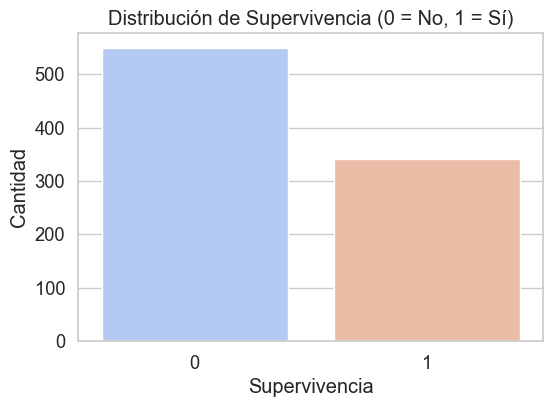

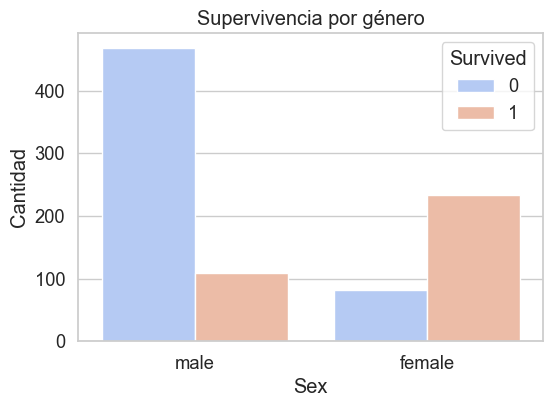

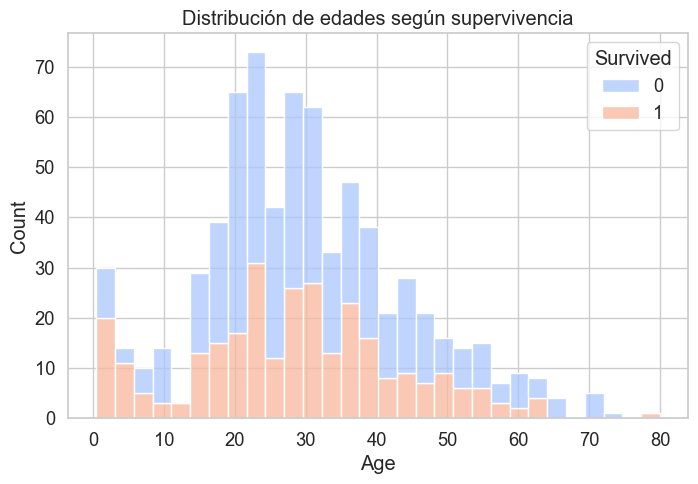

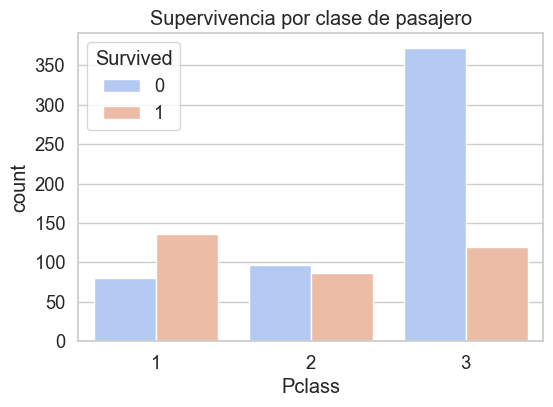

C:\Users\vpn\AppData\Local\Temp\ipykernel_20396\1903787411.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pclass", y="Age", data=train, palette="coolwarm")


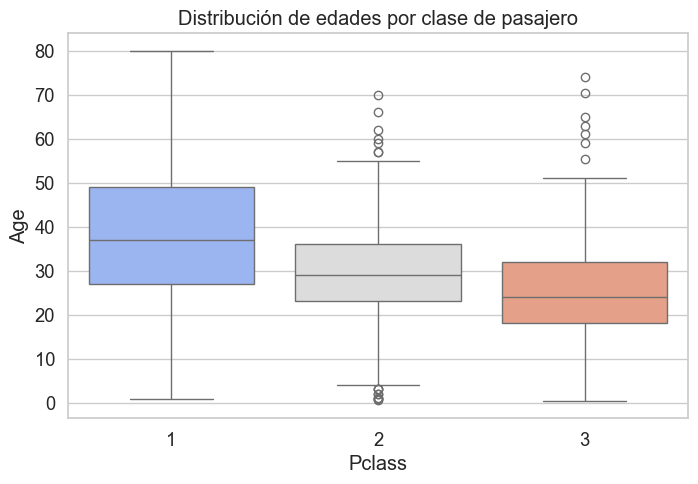

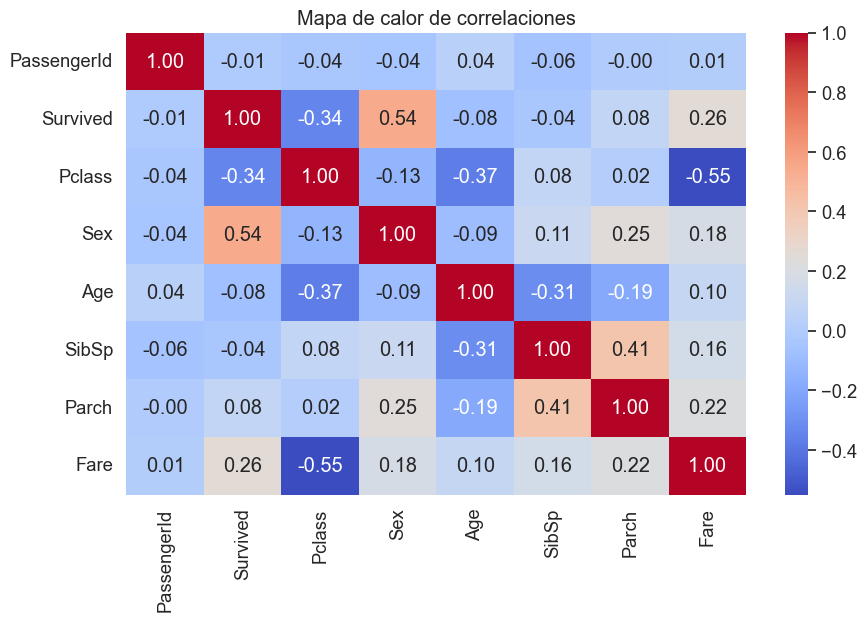

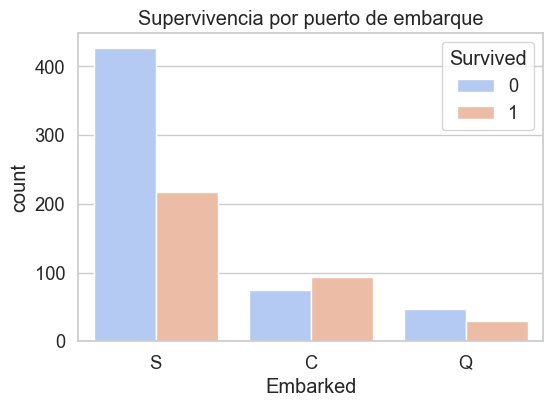

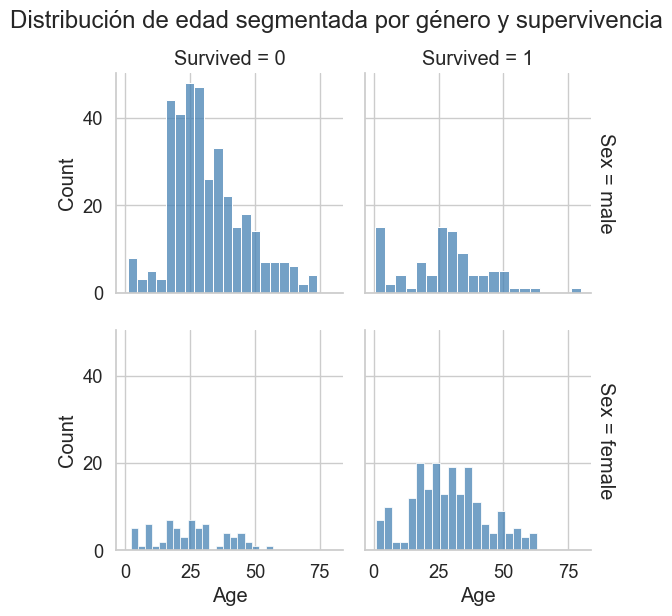

In [4]:
# ============================
# 1. Importar librerías
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual de seaborn
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# ============================
# 2. Cargar datos
# ============================
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Mostrar primeras filas
print("Primeras filas del dataset de entrenamiento:")
display(train.head())

# ============================
# 3. Información general
# ============================
print("\nInformación general del dataset:")
train.info()

print("\nValores nulos por columna:")
print(train.isnull().sum())

print("\nEstadísticas descriptivas:")
display(train.describe())

# ============================
# 4. Distribución de la variable objetivo
# ============================
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=train, palette="coolwarm")
plt.title("Distribución de Supervivencia (0 = No, 1 = Sí)")
plt.xlabel("Supervivencia")
plt.ylabel("Cantidad")
plt.show()

# ============================
# 5. Supervivencia por género
# ============================
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=train, palette="coolwarm")
plt.title("Supervivencia por género")
plt.ylabel("Cantidad")
plt.show()

# ============================
# 6. Distribución de edad por supervivencia
# ============================
plt.figure(figsize=(8,5))
sns.histplot(data=train, x="Age", hue="Survived", multiple="stack", bins=30, palette="coolwarm")
plt.title("Distribución de edades según supervivencia")
plt.show()

# ============================
# 7. Supervivencia por clase de pasajero
# ============================
plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=train, palette="coolwarm")
plt.title("Supervivencia por clase de pasajero")
plt.show()

# ============================
# 8. Boxplot de Edad vs Clase
# ============================
plt.figure(figsize=(8,5))
sns.boxplot(x="Pclass", y="Age", data=train, palette="coolwarm")
plt.title("Distribución de edades por clase de pasajero")
plt.show()

# ============================
# 9. Mapa de calor de correlaciones
# ============================
# Convertir variables categóricas a numéricas para la correlación
corr_data = train.copy()
corr_data["Sex"] = corr_data["Sex"].map({"male": 0, "female": 1})
corr_data = corr_data.drop(["Name", "Ticket", "Cabin", "Embarked"], axis=1)

plt.figure(figsize=(10,6))
sns.heatmap(corr_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()

# ============================
# 10. Relación entre puerto de embarque y supervivencia
# ============================
plt.figure(figsize=(6,4))
sns.countplot(x="Embarked", hue="Survived", data=train, palette="coolwarm")
plt.title("Supervivencia por puerto de embarque")
plt.show()

# ============================
# 11. FacetGrid: Edad vs Supervivencia segmentado por género
# ============================
g = sns.FacetGrid(train, col="Survived", row="Sex", height=3, margin_titles=True)
g.map_dataframe(sns.histplot, x="Age", bins=20, color="steelblue")
g.fig.suptitle("Distribución de edad segmentada por género y supervivencia", y=1.03)
plt.show()


In [5]:
# ==========================
# 4. Manejo de valores nulos
# ==========================

# Rellenar Age con la media
train["Age"].fillna(train["Age"].mean(), inplace=True)
test["Age"].fillna(test["Age"].mean(), inplace=True)

# Rellenar Embarked con el valor más frecuente (moda)
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)
test["Fare"].fillna(test["Fare"].mean(), inplace=True)  # Para test, Fare tenía un nulo


C:\Users\vpn\AppData\Local\Temp\ipykernel_20396\1094569210.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(train["Age"].mean(), inplace=True)
C:\Users\vpn\AppData\Local\Temp\ipykernel_20396\1094569210.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [6]:
# ==========================
# 5. Codificación de variables categóricas
# ==========================

label = LabelEncoder()

for col in ["Sex", "Embarked"]:
    train[col] = label.fit_transform(train[col])
    test[col] = label.transform(test[col])


In [7]:
# ==========================
# 6. Selección de características y variable objetivo
# ==========================

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train[features]        # Características (features)
y = train["Survived"]      # Variable objetivo (target)


In [8]:
# ==========================
# 7. División de datos en entrenamiento y validación
# ==========================

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
# ==========================
# 8. Entrenar modelo de Regresión Logística
# ==========================

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predicciones en el conjunto de validación
y_pred = model.predict(X_val)


In [10]:
# ==========================
# 9. Evaluación del modelo
# ==========================

print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [11]:
# ==========================
# 10. Predicción final para Kaggle
# ==========================

predictions = model.predict(test[features])

output = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions
})

output.to_csv("submission.csv", index=False)
print("Archivo submission.csv creado!")


Archivo submission.csv creado!
